In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from scipy.optimize import curve_fit 
from scipy.stats import norm, lognorm

In [8]:
y_test_pred = np.load('DQR/y_test_pred_joint_300s.npy')
y_test_mean = np.load('DQR/y_test_mean_300s.npy')
y_test_std = np.load('DQR/y_test_std_300s.npy')
y_test = np.load('DQR/y_test_300s.npy')
y_pred_s = np.load('DQR/y_test_pred_joint_samples_300s.npy')

In [10]:
y_test_pred_ = y_test_pred*np.repeat(y_test_std[..., np.newaxis, np.newaxis], 11, axis=4)+np.repeat(y_test_mean[..., np.newaxis, np.newaxis], 11, axis=4)

In [11]:
y_test_ = np.squeeze(y_test)*y_test_std+y_test_mean

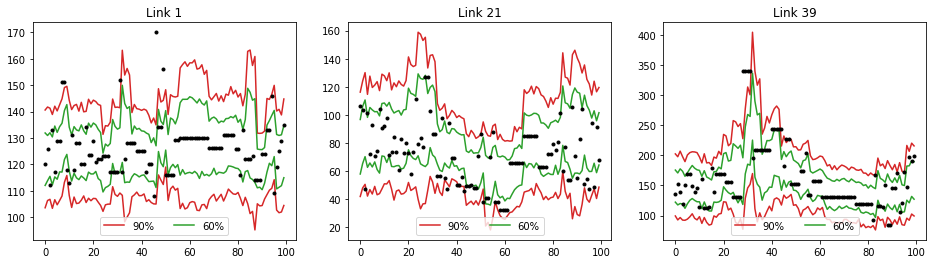

In [13]:
t = 200
ln = 4
n = 100

def plot_quantiles(ax, t, ln):
    ax.plot(np.quantile(y_pred_s[t:t+n, 0, ln], .95, axis=1), color='C3', label='90%')
    ax.plot(np.quantile(y_pred_s[t:t+n, 0, ln], .05, axis=1), color='C3')

    ax.plot(np.quantile(y_pred_s[t:t+n, 0, ln], .80, axis=1), color='C2', label='60%')
    ax.plot(np.quantile(y_pred_s[t:t+n, 0, ln], .20, axis=1), color='C2')
    
    #ax.plot(np.quantile(y_pred_s[t:t+n, 0, ln], .5, axis=1), color='K')
    ax.plot(y_test_[t:t+n, 0, ln], color='K', linestyle='', marker='.')
    ax.set_title(f'Link {ln+1}')
    ax.legend(loc = 'lower center', ncol=2)

fig, ax = plt.subplots(figsize=(16, 4), ncols=3)
plot_quantiles(ax[0], t, 0)
plot_quantiles(ax[1], t, 20)
plot_quantiles(ax[2], t, 38)

plt.savefig('dqr-quantiles.pdf', bbox_inches='tight')
plt.savefig('dqr-quantiles.png', bbox_inches='tight', dpi=300)

In [55]:
a = [0, 2, 3, 4]
b = [6, 7, 8, 9]

In [59]:
y_pred_s.shape

(1941, 3, 100, 500)

In [58]:
a_true = np.sum(y_test_[t, 0, a])
b_true = np.sum(y_test_[t, 0, b])

In [65]:
a_true

299.5

In [64]:
b_true

345.0

In [63]:
a_samples = np.sum(y_pred_s[t, 0, a], axis=0)
b_samples = np.sum(y_pred_s[t, 0, b], axis=0)

In [67]:
np.mean(b_samples)

284.3964176160932

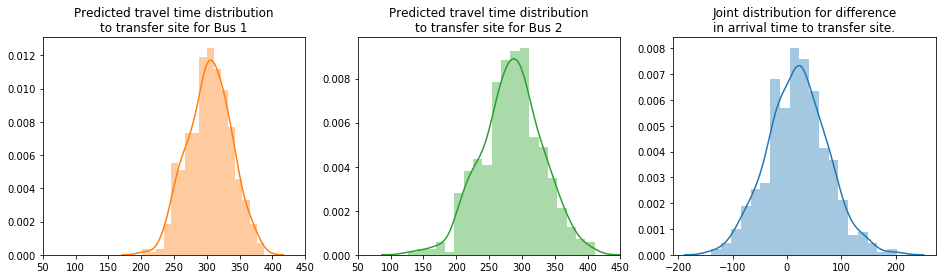

In [102]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=3)
sns.distplot(a_samples, ax=ax[0], color='C1')
ax[0].set_title('Predicted travel time distribution\nto transfer site for Bus 1')
ax[0].set_xlim(50, 450)
sns.distplot(b_samples, ax=ax[1], color='C2')
ax[1].set_title('Predicted travel time distribution\nto transfer site for Bus 2')
ax[1].set_xlim(50, 450)
sns.distplot(a_samples- b_samples, ax=ax[2])
ax[2].set_title('Joint distribution for difference\nin arrival time to transfer site.')

plt.savefig('dqr-connection-assurance-ex.pdf', bbox_inches='tight')
plt.savefig('dqr-connection-assurance-ex.png', bbox_inches='tight', dpi=300)

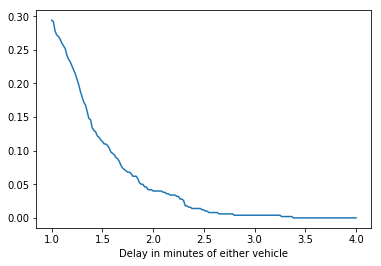

In [114]:
fig, ax = plt.subplots(figsize=(6, 4), ncols=1)
x = np.array([[x, np.mean((np.abs(a_samples - b_samples)) > x)] for x in range(60, 60*4+1, 1)])
ax.plot(x[:, 0]/60, x[:, 1])
ax.set_xlabel('Delay in minutes of either vehicle')
plt.savefig('dqr-connection-assurance-ex-cdf.png', bbox_inches='tight', dpi=300)

In [ ]:
np.abs((a_samples - b_samples))  x